In [1]:
# Notebook 5 — Store-Level Impact Summary & Insights Report

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:

# 1. Load Final Results From Notebook 4

data_dir = Path("../data")
file = data_dir / "notebook4_final_results.csv"

if not file.exists():
    raise FileNotFoundError("Run Notebook 4 before starting Notebook 5.")

results = pd.read_csv(file)
results

,trial_store,control_store,sales_diff,customers_diff,avgtx_diff,ttest_p,perm_p,final_verdict
0,77,167,75.10,3.666667,0.020333,0.024802,0.047391,Trial Impact Confirmed
1,86,159,886.00,101.333333,0.216000,0.002681,0.051590,No Strong Evidence
2,88,159,1372.85,123.333333,0.243333,0.000886,0.044991,Trial Impact Confirmed


In [3]:
# 2. High-Level Summary Table

summary = results[[
    "trial_store", "control_store", "sales_diff", "customers_diff", "avgtx_diff", "final_verdict"
]].copy()

summary

,trial_store,control_store,sales_diff,customers_diff,avgtx_diff,final_verdict
0,77,167,75.10,3.666667,0.020333,Trial Impact Confirmed
1,86,159,886.00,101.333333,0.216000,No Strong Evidence
2,88,159,1372.85,123.333333,0.243333,Trial Impact Confirmed


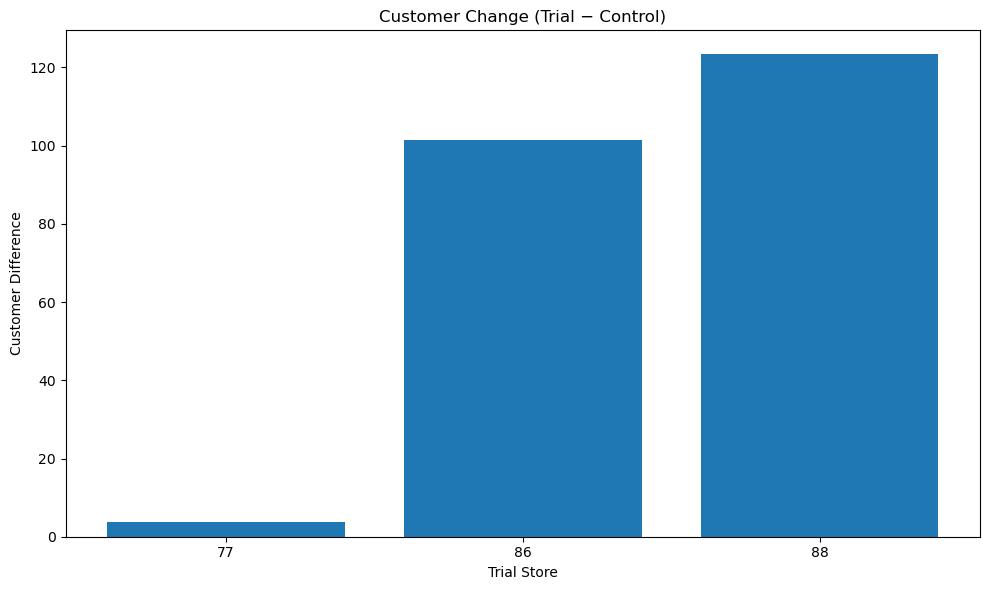

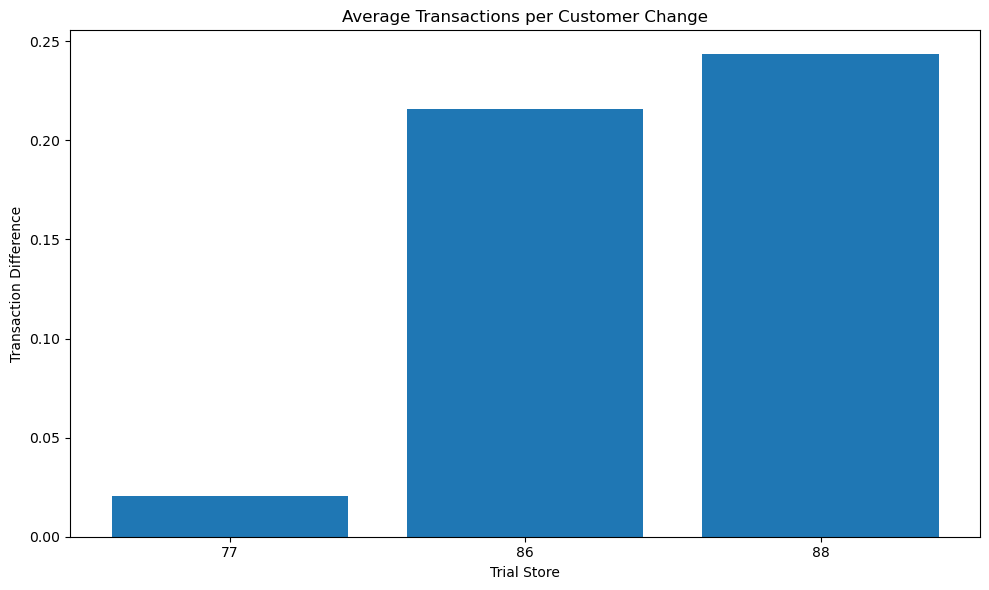

In [4]:
# 3. Visual Comparison — Drivers of Change
plt.figure(figsize=(10,6))
plt.bar(summary.trial_store.astype(str), summary.customers_diff)
plt.title("Customer Change (Trial − Control)")
plt.xlabel("Trial Store")
plt.ylabel("Customer Difference")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.bar(summary.trial_store.astype(str), summary.avgtx_diff)
plt.title("Average Transactions per Customer Change")
plt.xlabel("Trial Store")
plt.ylabel("Transaction Difference")
plt.tight_layout()
plt.show()

In [5]:
# 4. Final Interpretation Logic
# What caused the sales uplift? More customers vs more transactions?

summary["dominant_driver"] = summary.apply(
    lambda row: "Customers" if abs(row.customers_diff) > abs(row.avgtx_diff) else "Transactions",
    axis=1
)

summary

,trial_store,control_store,sales_diff,customers_diff,avgtx_diff,final_verdict,dominant_driver
0,77,167,75.10,3.666667,0.020333,Trial Impact Confirmed,Customers
1,86,159,886.00,101.333333,0.216000,No Strong Evidence,Customers
2,88,159,1372.85,123.333333,0.243333,Trial Impact Confirmed,Customers


In [6]:

# 5. Textual Insights — Auto-Generated
def generate_insight(row):
    if row.final_verdict == "Trial Impact Confirmed":
        return (
            f"Store {row.trial_store} showed a confirmed trial impact. "
            f"Sales increased by {row.sales_diff:.2f}, mainly driven by higher {row.dominant_driver.lower()}."
        )
    else:
        return (
            f"Store {row.trial_store} did not show strong statistical evidence of a trial impact. "
            f"Sales difference was {row.sales_diff:.2f}."
        )

summary["insight"] = summary.apply(generate_insight, axis=1)

summary

,trial_store,control_store,sales_diff,customers_diff,avgtx_diff,final_verdict,dominant_driver,insight
0,77,167,75.10,3.666667,0.020333,Trial Impact Confirmed,Customers,Store 77 showed a confirmed trial impact. Sale...
1,86,159,886.00,101.333333,0.216000,No Strong Evidence,Customers,Store 86 did not show strong statistical evide...
2,88,159,1372.85,123.333333,0.243333,Trial Impact Confirmed,Customers,Store 88 showed a confirmed trial impact. Sale...


In [7]:

# 6. Save Outputs

summary.to_csv(data_dir / "notebook5_store_impact_summary.csv", index=False)

print("Notebook 5 completed. Summary saved.")


Notebook 5 completed. Summary saved.
